In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPooling2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import to_categorical

# Load train and test CSV files
train_data = pd.read_csv('TRAIN.csv')  # Replace 'train.csv' with your actual train file
test_data = pd.read_csv('TEST.csv')    # Replace 'test.csv' with your actual test file

# Extract features and labels from train data
x_train = train_data.iloc[:, 1:11].values
y_train = train_data.iloc[:, 11].values

# Extract features and labels from test data
x_test = test_data.iloc[:, 1:11].values
y_test = test_data.iloc[:, 11].values

# Encode the target variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Define a Dense Neural Network model
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(256, activation='gelu', input_shape=(10,)))

model.add(Dense(128, activation='gelu'))

model.add(Dense(64, activation='gelu'))
model.add(Dropout(0.3))  # Adding dropout with a rate of 30%
model.add(Dense(4, activation='softmax'))


# Compile the model with Adam optimizer and a specific learning rate
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(x_train, y_train, epochs=200, batch_size=2, validation_data=(x_test, y_test))


Epoch 1/200
401/401 [==============================] - 3s 3ms/step - loss: 0.9344 - accuracy: 0.5736 - val_loss: 0.7746 - val_accuracy: 0.6450
Epoch 2/200
401/401 [==============================] - 1s 2ms/step - loss: 0.8256 - accuracy: 0.6209 - val_loss: 0.7539 - val_accuracy: 0.6350
Epoch 3/200
401/401 [==============================] - 1s 2ms/step - loss: 0.8007 - accuracy: 0.6384 - val_loss: 0.7643 - val_accuracy: 0.6450
Epoch 4/200
401/401 [==============================] - 1s 3ms/step - loss: 0.7874 - accuracy: 0.6509 - val_loss: 0.7186 - val_accuracy: 0.6850
Epoch 5/200
401/401 [==============================] - 1s 2ms/step - loss: 0.7861 - accuracy: 0.6559 - val_loss: 0.7723 - val_accuracy: 0.6450
Epoch 6/200
401/401 [==============================] - 1s 2ms/step - loss: 0.7625 - accuracy: 0.6608 - val_loss: 0.7309 - val_accuracy: 0.6700
Epoch 7/200
401/401 [==============================] - 1s 3ms/step - loss: 0.7715 - accuracy: 0.6683 - val_loss: 0.7150 - val_accuracy: 0.6800

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adamax  # Import SGD optimizer

# Load the 'esophagitis.csv' file
data = pd.read_csv('esophagities.csv')  # Replace with your actual file name

# Extract features and labels
x = data.iloc[:, 1:22].values
y = data.iloc[:, 22].values

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Define the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(512, activation='gelu', input_shape=(21,)))
model.add(Dense(256, activation='gelu'))
model.add(Dense(128, activation='gelu'))
model.add(Dense(64, activation='gelu'))
model.add(Dense(4, activation='softmax'))


model.compile(optimizer=Adamax(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(x_train, y_train, epochs=500, batch_size=2, validation_data=(x_test, y_test))


Epoch 1/500
350/350 [==============================] - 4s 4ms/step - loss: 0.8876 - accuracy: 0.5729 - val_loss: 0.8261 - val_accuracy: 0.6133
Epoch 2/500
350/350 [==============================] - 1s 4ms/step - loss: 0.7860 - accuracy: 0.6414 - val_loss: 0.8001 - val_accuracy: 0.6400
Epoch 3/500
350/350 [==============================] - 1s 4ms/step - loss: 0.7745 - accuracy: 0.6557 - val_loss: 0.7815 - val_accuracy: 0.6233
Epoch 4/500
350/350 [==============================] - 1s 4ms/step - loss: 0.7520 - accuracy: 0.6700 - val_loss: 0.7710 - val_accuracy: 0.6400
Epoch 5/500
350/350 [==============================] - 1s 4ms/step - loss: 0.7510 - accuracy: 0.6543 - val_loss: 0.7677 - val_accuracy: 0.6467
Epoch 6/500
350/350 [==============================] - 2s 5ms/step - loss: 0.7368 - accuracy: 0.6714 - val_loss: 0.7869 - val_accuracy: 0.6133
Epoch 7/500
350/350 [==============================] - 2s 5ms/step - loss: 0.7382 - accuracy: 0.6729 - val_loss: 0.7812 - val_accuracy: 0.6267

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict probabilities on the test set
y_probs = model.predict(x_test)

# Get predicted class labels
y_pred = np.argmax(y_probs, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')

10/10 [==============================] - 0s 4ms/step
Test Accuracy: 0.89


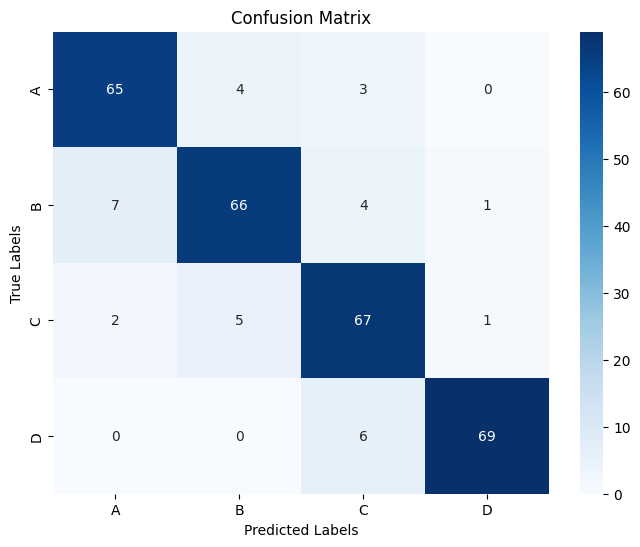

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()